In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("spotify_songs.csv")
df.head()

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America


In [ ]:
#univariate analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   float64
 6   Market Share (%)           1000 non-null   float64
 7   Regional 5G Coverage (%)   1000 non-null   float64
 8   5G Subscribers (millions)  1000 non-null   float64
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   float64
 11  Region                     1000 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
df.describe()

,Year,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%)
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2021.456000,32842.990000,3.019733e+07,3.723570,66.889720,30.152080,179.225560,67.14291
std,1.700281,16039.770572,1.837941e+07,1.991108,19.254095,14.537781,70.470934,15.75925
min,2019.000000,5309.000000,2.987436e+06,-0.490000,25.340000,-0.890000,50.370000,37.14000
25%,2020.000000,19327.250000,1.460749e+07,2.635000,50.400000,18.412500,120.410000,53.26750
50%,2021.000000,33689.000000,2.801200e+07,3.760000,67.050000,29.915000,177.390000,66.96000
75%,2023.000000,43911.000000,4.180391e+07,5.282500,83.210000,44.360000,238.860000,80.99000
max,2024.000000,64883.000000,8.426494e+07,6.950000,103.920000,54.940000,298.700000,94.84000


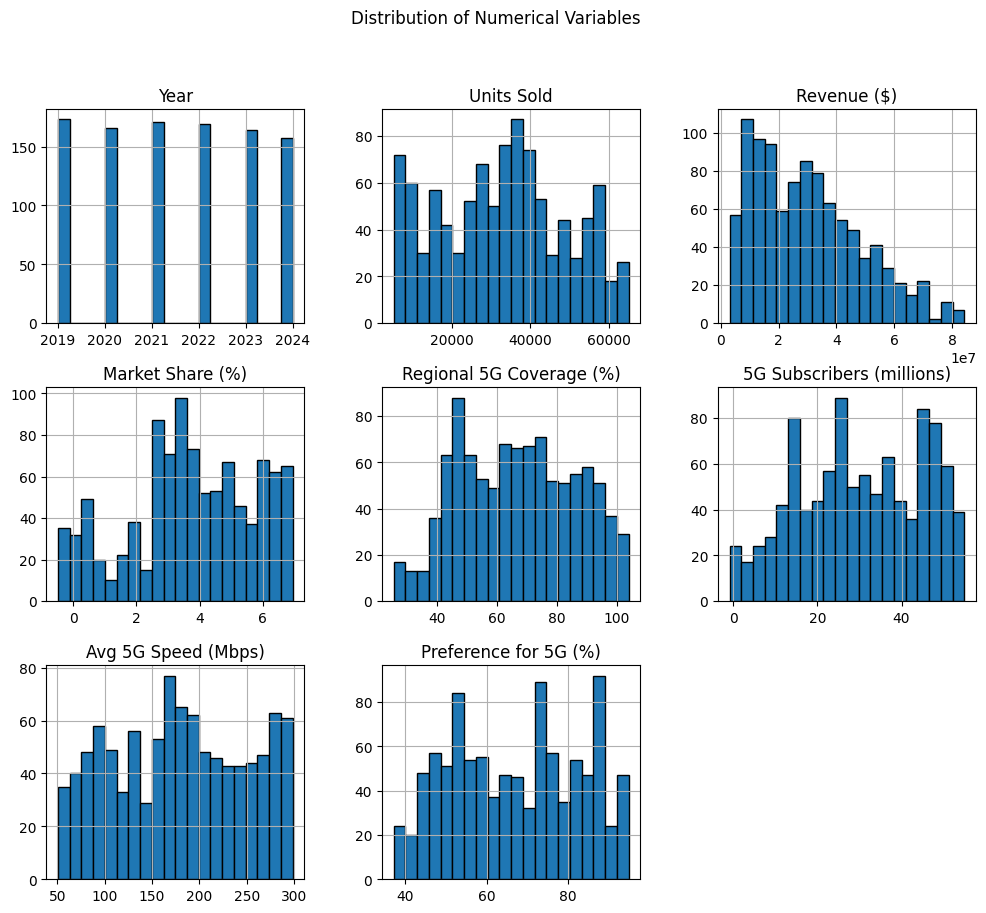

In [ ]:
# Histograms for numerical variables
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

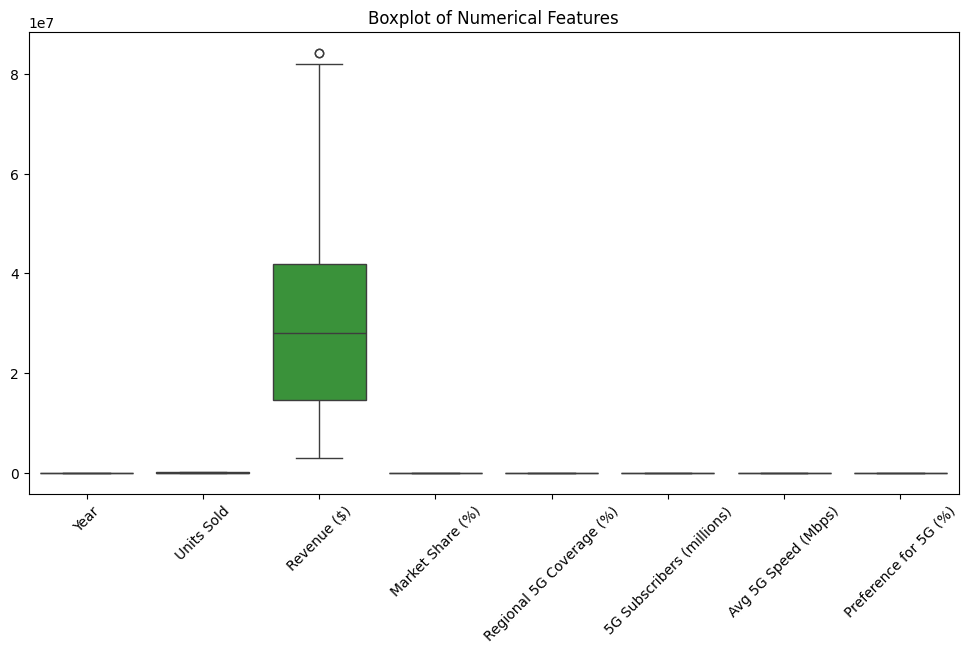

In [ ]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


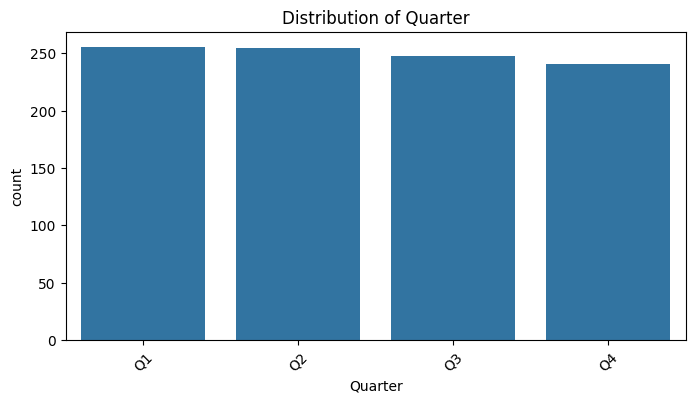

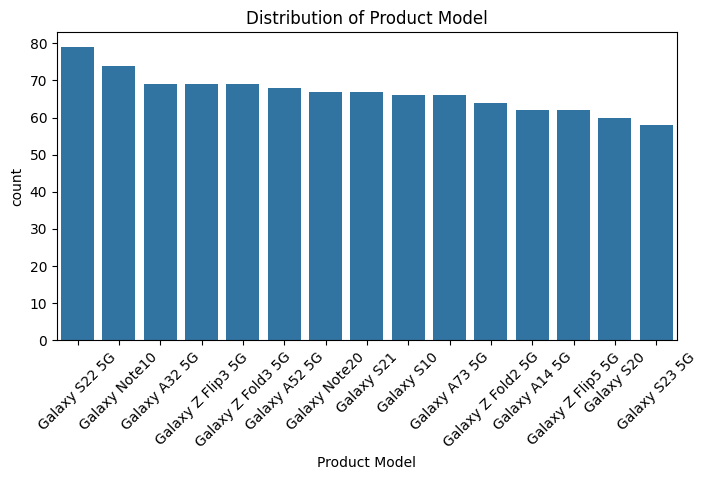

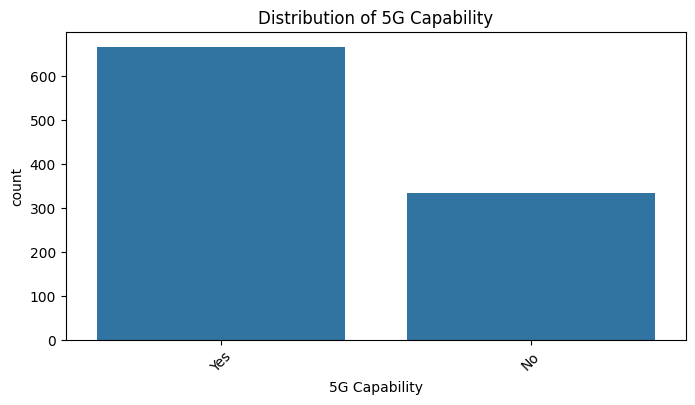

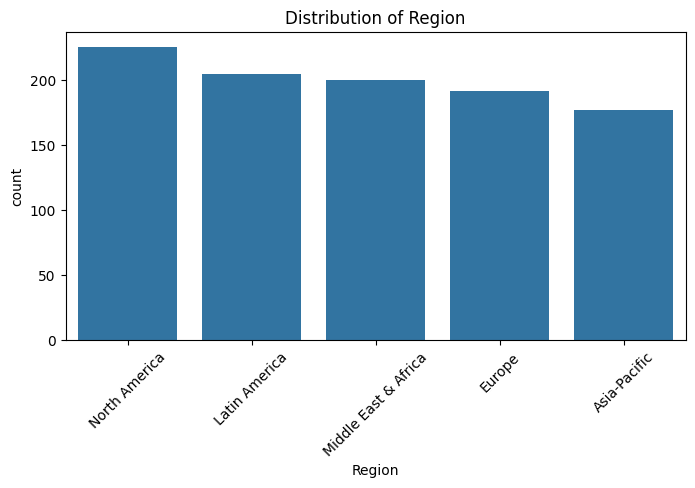

In [ ]:
# Count plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


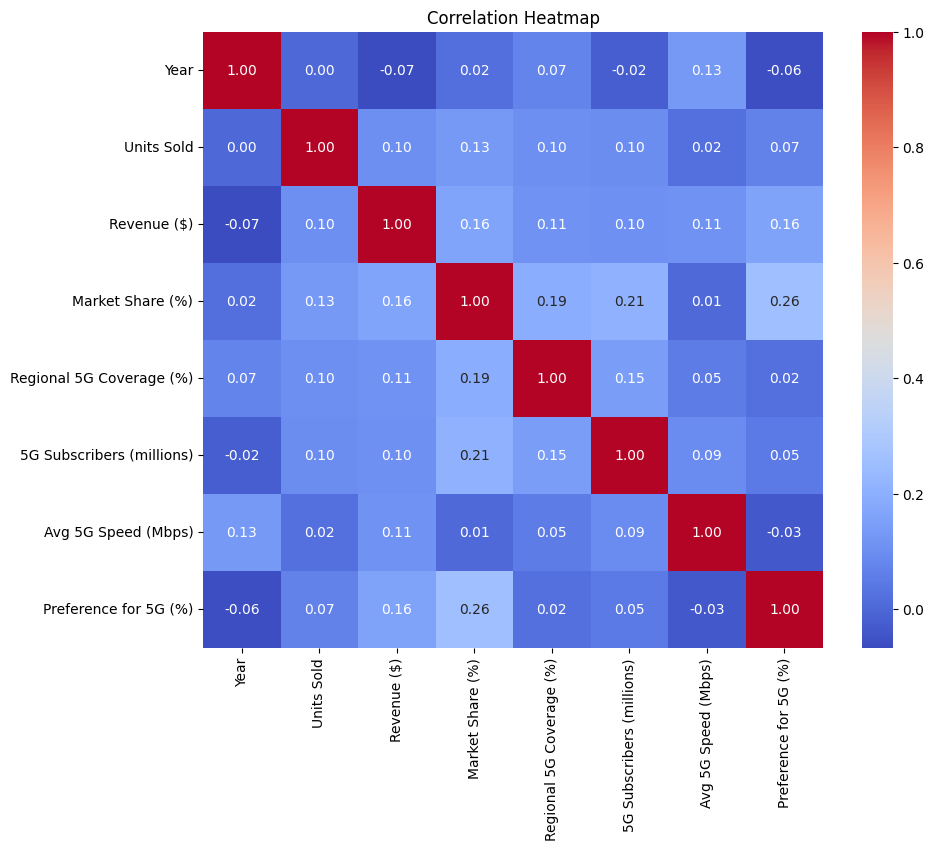

In [ ]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

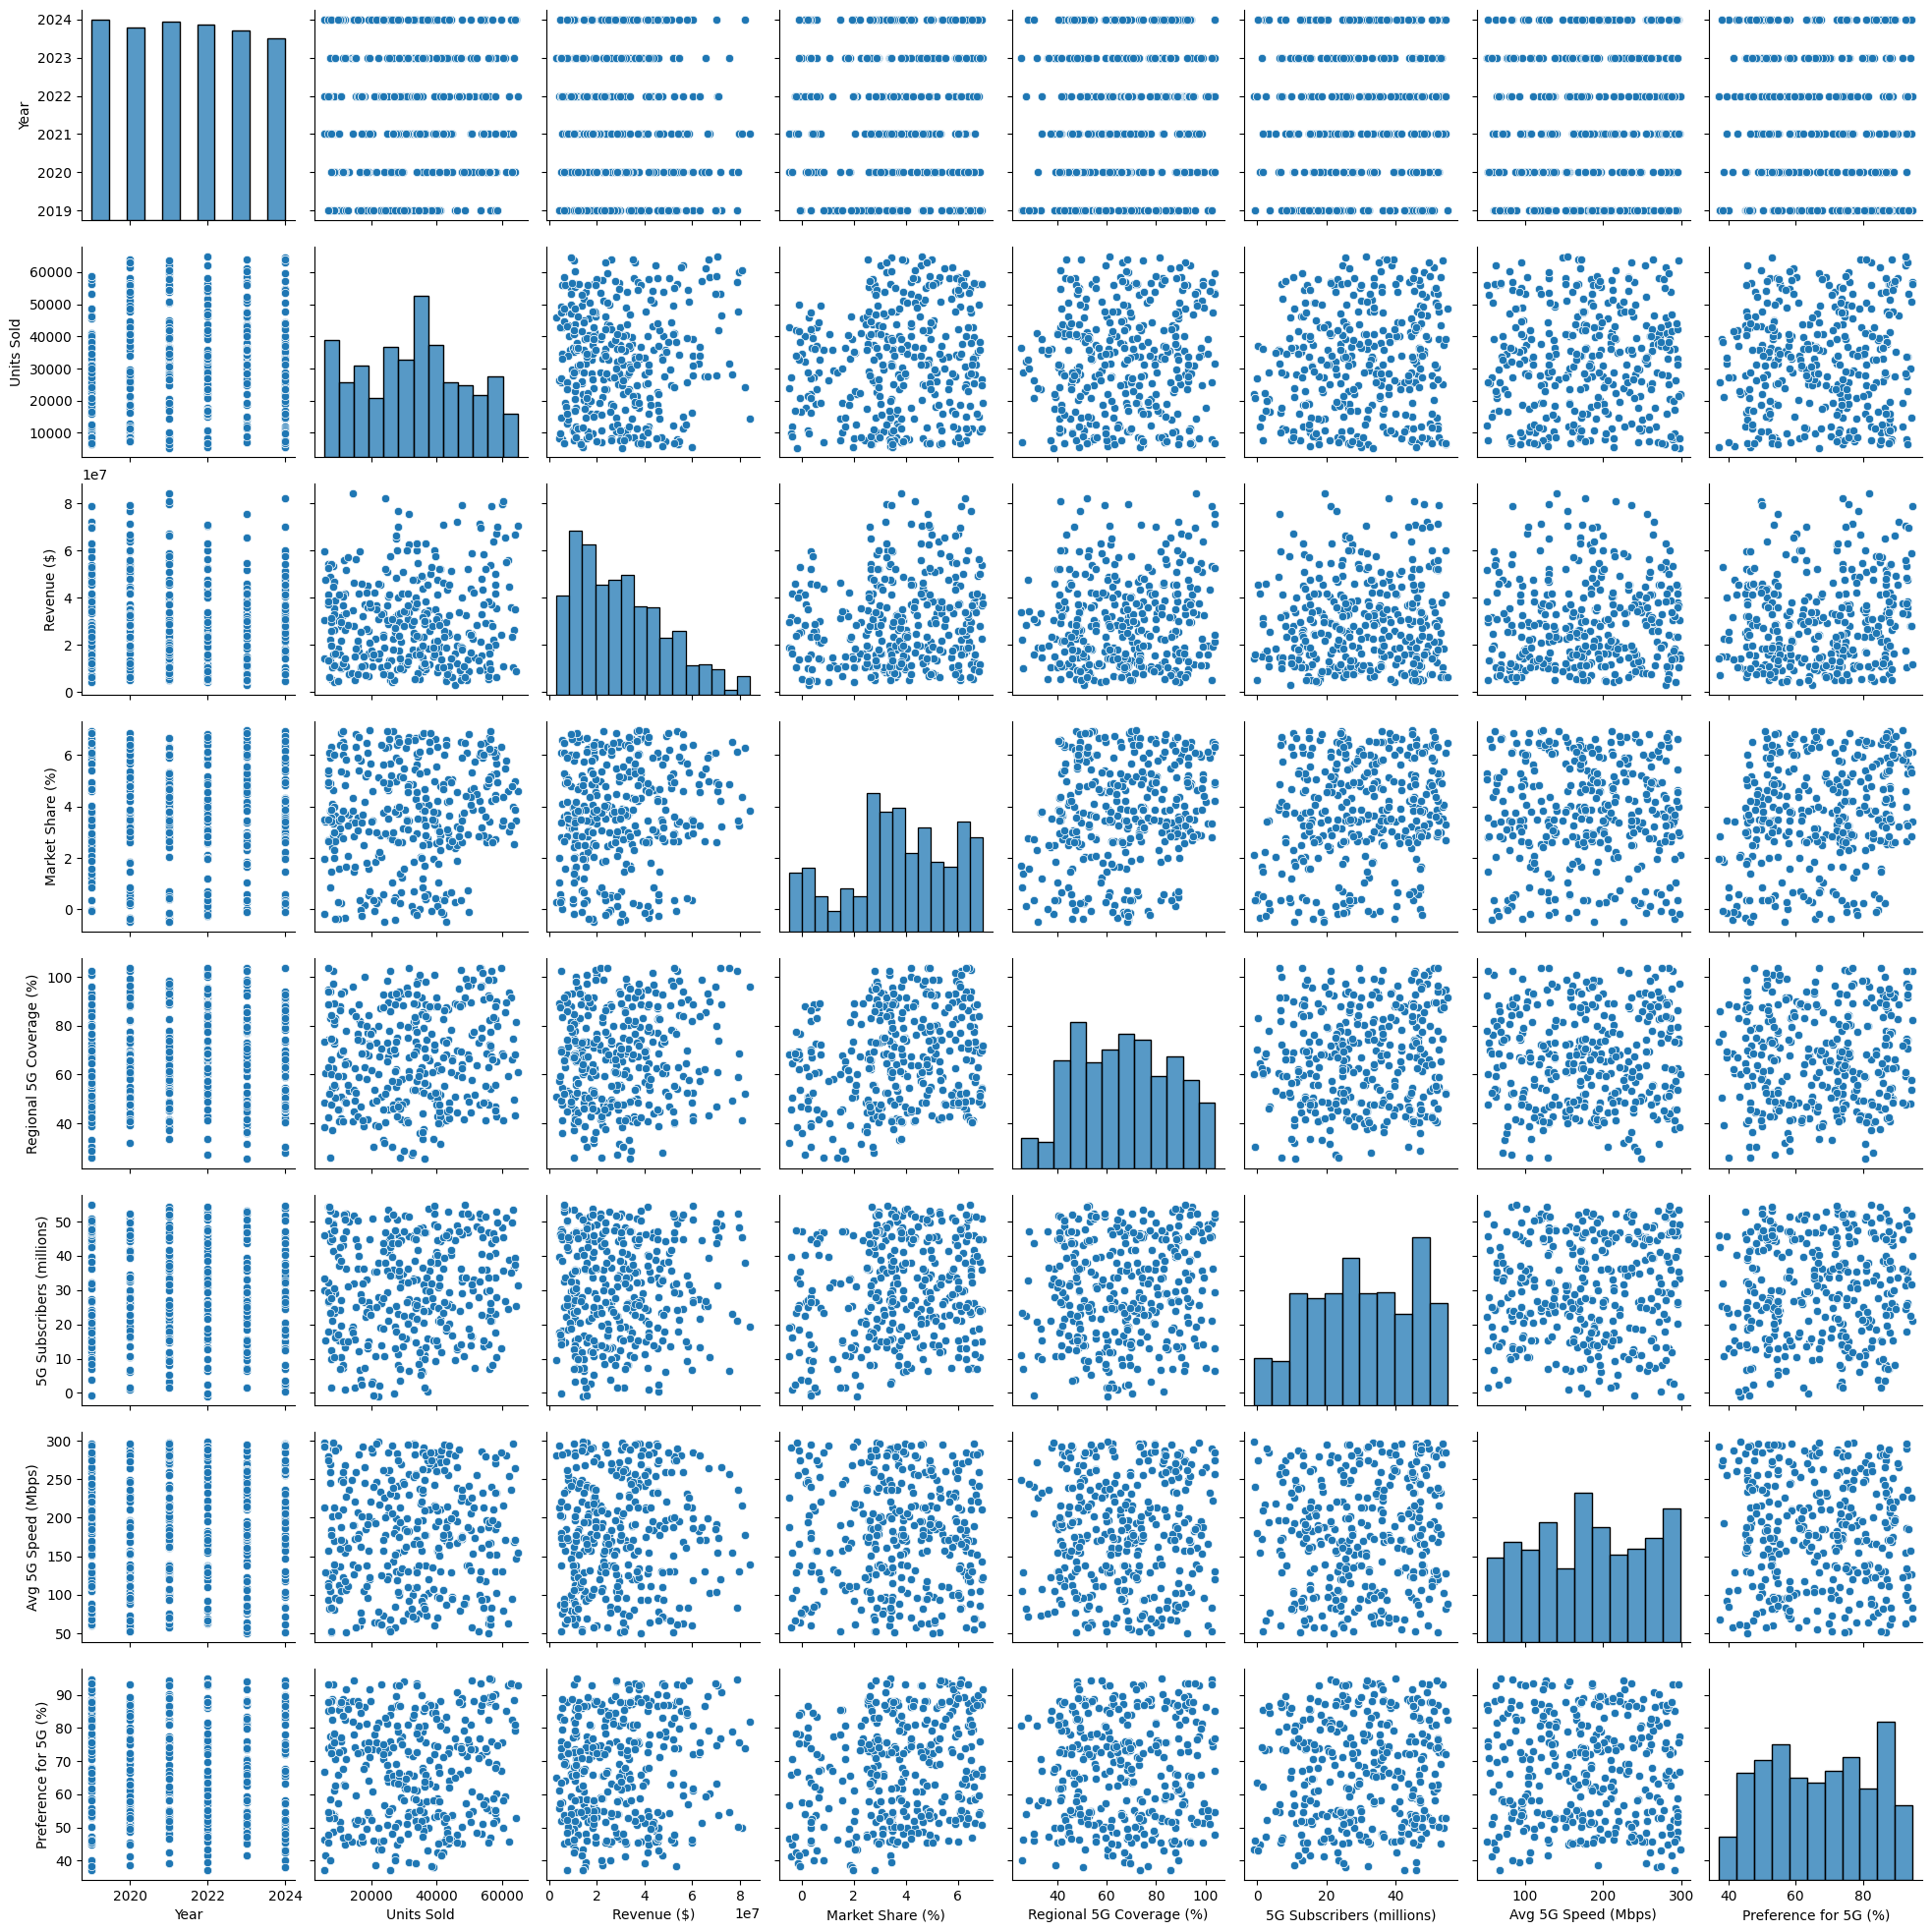

In [ ]:
# Scatter plot for numerical relationships
sns.pairplot(df)
plt.show()

In [ ]:
# Boxplot of numerical variable by a categorical feature
if 'track_genre' in df.columns and 'danceability' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='track_genre', y='danceability', data=df)
    plt.xticks(rotation=90)
    plt.title("Danceability Distribution Across Genres")
    plt.show()


In [ ]:
# Categorical vs Categorical (if applicable)
if 'track_genre' in df.columns and 'playlist_name' in df.columns:
    cross_tab = pd.crosstab(df['track_genre'], df['playlist_name'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(cross_tab, annot=False, cmap='Blues')
    plt.title("Genre vs Playlist Heatmap")
    plt.show()

In [ ]:
# Save the cleaned dataset
df.to_csv("Spotify_Songs_Cleaned.csv", index=False)